## Contralateral Bruxism/MEMA analysis

This notebook will 
- Process and generate reports for all the dataset (if needed)
- Display within-subject with contralateral recording of EMG/MEMA results
- Display group analysis differences between effect variables (masking, VAS, etc.) and contralateral differences

In [5]:
import os
PATH = os.getcwd() 
import sys
sys.path.append(PATH + '/../')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
print("config loaded")


config loaded


In [2]:
#Setting parameters
results_file_bruxism = "data/reports_and_datas_bruxism.pk"
results_file_mema = "data/reports_and_datas_MEMA.pk"
info_file = "data/data_info.csv"

# PART 1 Compute Results
Skip to Part 2 if results files has been computed already

## Processing of the dataset and report generation

In [3]:
# change to --overwrite True if you want to force to recompute the results
%run ../compute_results.py --bruxism True --overwrite False --mema True


config loaded.
Performs Bruxism: <True>
Performs MEMA: <True>
Will overwrite existing results: <False>
parameters set
result files exist: Reports creation skipped.


# Part 2 Load and Analysis Results
Part 1 is optional if the .pk has been saved

### Loading results

In [3]:
results_file_mema = "data/reports_and_datas_MEMA_pure.pk"
results = pd.read_pickle(results_file_mema).to_dict()
print(results.keys())
THR_classif = np.array(results[list(results.keys())[0]]["THR_classif"])
results_update=dict()
    


data_info = pd.read_csv(info_file, sep=";").query('mema == 1 & emg==1')
laterality_study=[]
# format reports
reports = None
for filename in results.keys():
    if filename[-4:]=="left":
        if filename!="1SL21_nuit_3.edf_left":
            if filename!='1CB23_cohort2.edf_left':
                if filename!='1HB20_nuit_2.edf_left':
                    if filename!='1UC22_nuit_2.edf_left':
                        if filename!='3KB06_cohort2.edf_left':
                            if filename!='2TL07_nuit_1.edf_left':
            
                                laterality_study.append(filename[:-5])
print(laterality_study)
#print(results.keys())
        
for filename in results.keys():
    if filename[-4:]=="left" or filename[-5:]=="right" or filename == '1HB20_nuit_1.edf' or filename == '1SL21_nuit_2.edf' or filename == '1UC22_nuit_1.edf':
        
        report = pd.DataFrame(results[filename]["reports"])
        report["THR_classif"] = THR_classif[:,1]
        if filename == '1HB20_nuit_1.edf' or filename == '1SL21_nuit_2.edf' or filename == '1UC22_nuit_1.edf':
            report["filename"] = filename+"_right"
        else:
            report["filename"] = filename
        #if filename[:5] == "2TL07":
        #    print(results[filename]["reports"])
        results_update[filename]=results[filename]
        if reports is None:
            reports = report
        else:
            reports = reports.append(report, ignore_index=True)
    
#print(laterality_study)
print(reports[["filename", "Number of MEMA episodes per hour" ]])

data_info["has_left"] = data_info["filename"]
for col_name, data in data_info["filename"].items():
    if laterality_study.__contains__(data):
        data_info["has_left"][col_name]=data+"_left"
    else:
        data_info["has_left"][col_name]=False


data_info = data_info.query('has_left!=False')
print(data_info[["filename", "condition", "mema", "emg","Laterality", "VAS_L_delta", "has_left" ]])
results=results_update


dict_keys(['1AC26_cohort2.edf_right', '1AC26_cohort2.edf_left', '1CB23_cohort2.edf_right', '1CB23_cohort2.edf_left', '1DA15_nuit_hab.edf', '1DM32_cohort2.edf_right', '1DM32_cohort2.edf_left', '1GB18_nuit_hab.edf', '1GF14_cohort2.edf', '1HB20_nuit_1.edf', '1HB20_nuit_1.edf_left', '1HB20_nuit_2.edf', '1HB20_nuit_2.edf_left', '1HS25_cohort2.edf_right', '1HS25_cohort2.edf_left', '1NS30_cohort2.edf_right', '1NS30_cohort2.edf_left', '1PA31_cohort2.edf', '1RF29_cohort2.edf_right', '1RF29_cohort2.edf_left', '1SL21_nuit_2.edf', '1SL21_nuit_2.edf_left', '1SL21_nuit_3.edf', '1SL21_nuit_3.edf_left', '1SL21_nuit_6.edf', '1SL21_nuit_7.edf', '1SL21_nuit_8.edf', '1UC22_nuit_1.edf', '1UC22_nuit_1.edf_left', '1UC22_nuit_2.edf', '1UC22_nuit_2.edf_left', '1ZN04_cohort2.edf_right', '1ZN04_cohort2.edf_left', '2CT04_nuit_1.edf', '2GA06_nuit_1.edf', '2GR01_nuit_3.edf', '2GR01_nuit_4.edf', '2LS05_nuit_1.edf', '2SJ03_nuit_1.edf', '2TL07_nuit_1.edf_right', '2TL07_nuit_1.edf_left', '3BS04_cohort2.edf_right', '3BS

C:\Users\Zeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Zeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             filename    condition  mema  emg  Laterality  VAS_L_delta  \
28   1HB20_nuit_1.edf  habituation     1    1         1.0          0.0   
36   1SL21_nuit_2.edf  habituation     1    1         1.0         -1.0   
40   1UC22_nuit_1.edf  habituation     1    1         0.5          2.0   
57  1ZN04_cohort2.edf       batch2     1    1         0.5          0.0   
58  1HS25_cohort2.edf       batch2     1    1        -0.5          4.0   
62  1RF29_cohort2.edf       batch2     1    1         1.0         -1.0   
64  1DM32_cohort2.edf       batch2     1    1         0.0         -1.0   
65  3BS04_cohort2.edf       batch2     1    1        -0.5         -1.0   
66  3TR07_cohort2.edf       batch2     1    1         0.0         -1.0   
68  1NS30_cohort2.edf       batch2     1    1         0.5          2.0   
69  1AC26_cohort2.edf       batch2     1    1        -1.0         -1.0   
72  3HS08_cohort2.edf       batch2     1    1         0.0          0.0   

                  has_left  
28   1HB

1HB20_nuit_1.edf
1.0
-8.955954323001631
1SL21_nuit_2.edf
1.0
-6.650985226322177
1UC22_nuit_1.edf
0.5
-18.747882470574947
1ZN04_cohort2.edf
0.5
-1.3329370725344862
1HS25_cohort2.edf
-0.5
3.434996827515124
1RF29_cohort2.edf
1.0
0.534723138183153
1DM32_cohort2.edf
0.0
0.21486277430814127
3BS04_cohort2.edf
-0.5
-1.5871764442268272
3TR07_cohort2.edf
0.0
-1.9599439717349947
1NS30_cohort2.edf
0.5
1.5802878406507972
1AC26_cohort2.edf
-1.0
5.220427323298975
3HS08_cohort2.edf
0.0
-1.4592352615331095
SpearmanrResult(correlation=-0.4795572468976735, pvalue=0.1146516489557299)
LinregressResult(slope=-5.133564672472726, intercept=-1.4062420987325135, rvalue=-0.5236397242658676, pvalue=0.08058878748701517, stderr=2.6411639730737466)


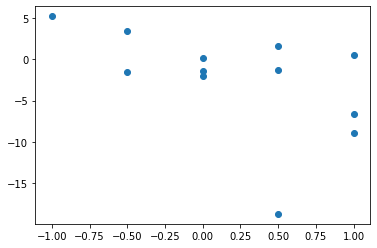

In [6]:
#print(data_info.query('has_left!=False'))
#print(float(data_info.query('filename=="1HB20_nuit_1.edf"')["Laterality"]))
for THR in [3]:
    datas=[[],[]]
    for file in data_info["filename"]:
        print(file)
        file_left = file+"_left"
        file_right = file+"_right"
        print(float(data_info.query('filename==@file')["Laterality"]))
        print(float(reports.query('filename==@file_right & THR_classif==@THR')["Number of MEMA episodes per hour"])
                        - float(reports.query('filename==@file_left & THR_classif==@THR')["Number of MEMA episodes per hour"]))
        
        datas[0].append(float(data_info.query('filename==@file')["Laterality"]))
        datas[1].append(float(reports.query('filename==@file_right & THR_classif==@THR')["Number of MEMA episodes per hour"])
                        - float(reports.query('filename==@file_left & THR_classif==@THR')["Number of MEMA episodes per hour"]))
    plt.figure()
    plt.scatter(datas[0], datas[1])
    print(scipy.stats.spearmanr(datas[0],datas[1]))
    print(scipy.stats.linregress(datas[0],datas[1]))

## 

1HB20_nuit_1.edf
1.0
-8.955954323001631
1SL21_nuit_2.edf
1.0
-6.650985226322177
1UC22_nuit_1.edf
0.5
-18.747882470574947
1ZN04_cohort2.edf
0.5
-1.3329370725344862
1HS25_cohort2.edf
-0.5
3.434996827515124
1RF29_cohort2.edf
1.0
0.534723138183153
1DM32_cohort2.edf
0.0
0.21486277430814127
3BS04_cohort2.edf
-0.5
-1.5871764442268272
3TR07_cohort2.edf
0.0
-1.9599439717349947
1NS30_cohort2.edf
0.5
1.5802878406507972
1AC26_cohort2.edf
-1.0
5.220427323298975
3HS08_cohort2.edf
0.0
-1.4592352615331095
SpearmanrResult(correlation=0.4246406484542905, pvalue=0.1688385334657336)
LinregressResult(slope=3.880895502767998, intercept=2.204465992157698, rvalue=0.29196846518669406, pvalue=0.35713550011925776, stderr=4.02020555551624)


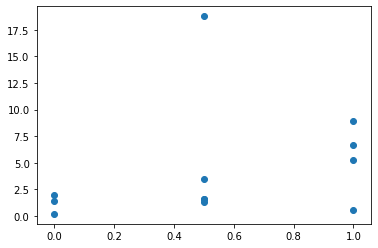

In [7]:
for THR in [3]:
    datas=[[],[]]
    for file in data_info["filename"]:
        print(file)
        file_left = file+"_left"
        file_right = file+"_right"
        print(float(data_info.query('filename==@file')["Laterality"]))
        print(float(reports.query('filename==@file_right & THR_classif==@THR')["Number of MEMA episodes per hour"])
                        - float(reports.query('filename==@file_left & THR_classif==@THR')["Number of MEMA episodes per hour"]))
        
        datas[0].append(abs(float(data_info.query('filename==@file')["Laterality"])))
        datas[1].append(abs(float(reports.query('filename==@file_right & THR_classif==@THR')["Number of MEMA episodes per hour"])
                        - float(reports.query('filename==@file_left & THR_classif==@THR')["Number of MEMA episodes per hour"])))
    plt.figure()
    plt.scatter(datas[0], datas[1])
    print(scipy.stats.spearmanr(datas[0],datas[1]))
    print(scipy.stats.linregress(datas[0],datas[1]))

## Data visualization for the entire cohort for nb bursts as a function of THR_classif value : 

## Logs of the preprocessing : 

## Comparing episode frequency with variability tinnitus

## Displaying correlation between quantitative measurements and Tinnitus